<a href="https://colab.research.google.com/github/bhuwich/Tensorflow/blob/main/FirstTensorflowProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

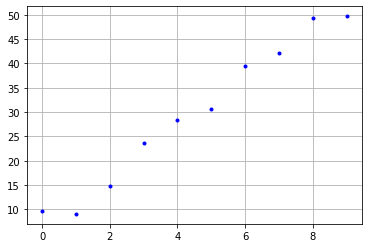

In [ ]:
x = np.arange(0,10)
t = 5*x + 4 + np.random.rand(x.shape[0])*6

plt.plot(x, t , 'b.')
plt.grid()

In [ ]:
# build model
m = tf.Variable(5.0)
c = tf.Variable(2.0)
print(m)
print(c)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [ ]:
y = m*x + c
print(y)

tf.Tensor([ 2.  7. 12. 17. 22. 27. 32. 37. 42. 47.], shape=(10,), dtype=float32)


In [ ]:
# compute gradient of m, c
with tf.GradientTape() as tape:
  y = m*x+ c
  # mean square error (y-t)
  loss = tf.reduce_mean(tf.square(y-t))
  g_m, g_c = tape.gradient(loss, [m, c])
  print(g_m)
  print(g_c)

tf.Tensor(-46.678024, shape=(), dtype=float32)
tf.Tensor(-10.315892, shape=(), dtype=float32)


In [ ]:
m.assign_sub(0.01*g_m)
print(m)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.46678>


In [ ]:
c.assign_sub(0.01*g_c)
print(c)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.103159>


In [ ]:
epochs = 1000
lr = 0.01
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    y = m*x + c
    loss = tf.reduce_mean(tf.square(y-t))
  g_m, g_c = tape.gradient(loss,[m,c])
  m.assign_sub(lr*g_m)
  c.assign_sub(lr*g_c)
  print(epoch, loss.numpy())

0 6.6646934
1 6.6391463
2 6.613884
3 6.5889044
4 6.564208
5 6.53979
6 6.515645
7 6.491777
8 6.468174
9 6.444838
10 6.4217653
11 6.3989487
12 6.3763933
13 6.3540883
14 6.332036
15 6.310237
16 6.28868
17 6.267362
18 6.2462893
19 6.2254486
20 6.2048497
21 6.1844797
22 6.1643367
23 6.144422
24 6.1247334
25 6.105265
26 6.0860147
27 6.066985
28 6.0481653
29 6.029559
30 6.0111628
31 5.9929748
32 5.974991
33 5.9572077
34 5.939625
35 5.922242
36 5.905055
37 5.8880596
38 5.8712587
39 5.8546476
40 5.8382206
41 5.821977
42 5.805915
43 5.7900405
44 5.7743406
45 5.7588196
46 5.743477
47 5.728301
48 5.7132945
49 5.698463
50 5.6837935
51 5.66929
52 5.6549516
53 5.6407757
54 5.62676
55 5.6128993
56 5.5991945
57 5.5856433
58 5.572248
59 5.5589995
60 5.545905
61 5.5329566
62 5.5201526
63 5.5074935
64 5.4949765
65 5.4825997
66 5.4703674
67 5.4582663
68 5.446307
69 5.4344764
70 5.4227815
71 5.411222
72 5.3997893
73 5.388483
74 5.3773103
75 5.3662567
76 5.3553314
77 5.344531
78 5.333849
79 5.323287
80 5.312

In [ ]:
y = (m*x+c).numpy()
print(y)

[ 7.078273 12.095368 17.112465 22.129559 27.146656 32.16375  37.180847
 42.19794  47.21504  52.232136]


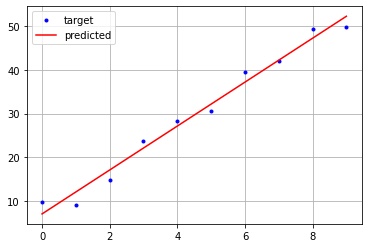

In [ ]:
plt.plot(x, t, 'b.')
plt.plot(x, y, 'r-')
plt.grid()
plt.legend(['target','predicted'])

In [ ]:
inputs = tf.keras.Input(shape=(1,))
y = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs=inputs, outputs=y)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.variables

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.0080626]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [ ]:
with tf.GradientTape() as tape:
  y = model(x)
  loss = tf.reduce_mean(tf.square(y-t))
tape.gradient(loss, model.variables)

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-324.38107]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-68.38846], dtype=float32)>]

In [ ]:
def mse_function(t, y):
  return tf.reduce_mean(tf.square(y-t))

In [ ]:
model.compile(optimizer='SGD',loss=mse_function)

In [ ]:
model.fit(x, t, epochs=100)

In [ ]:
class NewLayer(tf.keras.Model):
  def __init__(self):
    super(NewLayer, self).__init__()
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(2.0)

  def call(self,x):
    return self.w*x + self.b

In [ ]:
new_layer = NewLayer()

In [ ]:
inputs = tf.keras.Input(shape=(1,))
y = new_layer(inputs)
model = tf.keras.Model(inputs=inputs,outputs=y)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 new_layer (NewLayer)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(x)

1/1 [==============================] - 0s 116ms/step


array([[ 2.],
       [ 7.],
       [12.],
       [17.],
       [22.],
       [27.],
       [32.],
       [37.],
       [42.],
       [47.]], dtype=float32)